In [1]:
import pickle
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open("E_list_SEQ_ROT_sim.json", "r") as read_file:
    E_list_SEQ_ROT_sim = json.load(read_file)
with open("E_list_STANDARD_sim.json", "r") as read_file:
    E_list_STANDARD_sim = json.load(read_file)
with open("E_LCU_list_sim.json", "r") as read_file:
    E_LCU_list_sim = json.load(read_file)


In [3]:
E_LCU_list_sim=np.array(E_LCU_list_sim)
E_list_SEQ_ROT_sim=np.array(E_list_SEQ_ROT_sim)
E_list_STANDARD_sim=np.array(E_list_STANDARD_sim)

In [110]:
E_list_STANDARD_sim.shape[0]

1616700

In [112]:
E_list_SEQ_ROT_sim.shape[0]

9985500

In [4]:
fci_energy= -7.971184315565538

# Histogram

In [5]:
from scipy.optimize import curve_fit

In [6]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

# Single DATA

#### seq rot

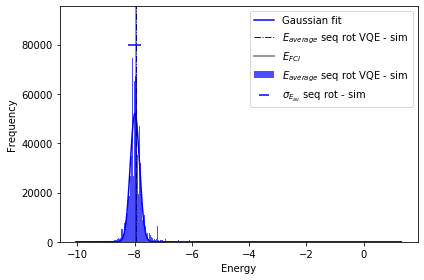

In [7]:
from matplotlib import pyplot
%matplotlib inline


# bins = len(set(E_list_SEQ_ROT_sim))
bins = 5000


bin_heights_SEQ_ROT_sim, bin_borders_SEQ_ROT_sim, _=pyplot.hist(E_list_SEQ_ROT_sim, 
                                                                bins, alpha=0.7, 
                                                                label='$E_{average}$ seq rot VQE - sim', 
                                                                color='b',
                                                              density=False)

bin_centers_SEQ_ROT_sim = bin_borders_SEQ_ROT_sim[:-1] + np.diff(bin_borders_SEQ_ROT_sim) / 2
popt, _ = curve_fit(gaussian, bin_centers_SEQ_ROT_sim, bin_heights_SEQ_ROT_sim, p0=[fci_energy, 0, 1], **{'maxfev':10000})
mean_SEQ_ROT_sim, amplitude_SEQ_ROT_sim, standard_deviation_SEQ_ROT_sim= popt
x_interval_for_fit = np.linspace(bin_borders_SEQ_ROT_sim[0], bin_borders_SEQ_ROT_sim[-1], 10000)
pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='b')


# pyplot.axvline(mean_SEQ_ROT_sim, color='b', linestyle='dashdot', linewidth=1, 
#             label='$E_{average}$ seq rot VQE - sim') # mean of GAUSSIAN FIT

pyplot.axvline(E_list_SEQ_ROT_sim.mean(), color='b', linestyle='dashdot', linewidth=1, 
            label='$E_{average}$ seq rot VQE - sim') # mean of DATA

pyplot.errorbar(mean_SEQ_ROT_sim, 80_000,
             xerr=standard_deviation_SEQ_ROT_sim, linestyle="None", color='b',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$ seq rot - sim')




pyplot.axvline(fci_energy, color='k', linestyle='solid', linewidth=2, 
            label='$E_{FCI}$', alpha=0.4)

pyplot.legend(loc='upper right')
# pyplot.legend(bbox_to_anchor=(0.865,1.9), loc="upper left")
pyplot.ylabel('Frequency')
pyplot.xlabel('Energy')

pyplot.tight_layout()

file_name = 'LiH_Histogram_sim_SEQ_ROT_Gaussian.jpeg'
pyplot.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')
pyplot.show()

## Standard single Gaussian

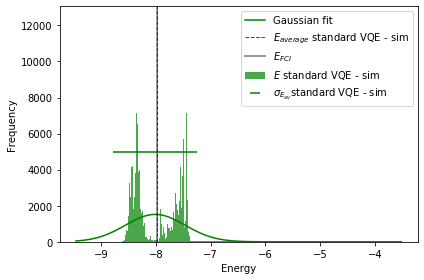

In [8]:
from matplotlib import pyplot
%matplotlib inline


# bins_standard = len(set(E_list_STANDARD_sim))
bins_standard = 5000

bin_heights_STANDARD, bin_borders_STANDARD, _=pyplot.hist(E_list_STANDARD_sim,
                                                          bins_standard, alpha=0.7,
                                                          label='$E$ standard VQE - sim',
                                                          color='g',
                                                          density=False)

bin_centers_STANDARD = bin_borders_STANDARD[:-1] + np.diff(bin_borders_STANDARD) / 2
popt, _ = curve_fit(gaussian, bin_centers_STANDARD, bin_heights_STANDARD, p0=[fci_energy, 0., 1.], **{'maxfev':10000})
mean_STANDARD, amplitude_STANDARD, standard_deviation_STANDARD= popt
x_interval_for_fit = np.linspace(bin_borders_STANDARD[0], bin_borders_STANDARD[-1], 10000)
pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='g')


# pyplot.axvline(mean_STANDARD, color='g', linestyle='dashed', linewidth=1, 
#             label='$E_{average}$ standard VQE - sim') # mean of GAUSSIAN FIT

pyplot.axvline(E_list_STANDARD_sim.mean(), color='g', linestyle='dashed', linewidth=1, 
            label='$E_{average}$ standard VQE - sim') # mean of DATA

pyplot.errorbar(mean_STANDARD,5_000,
             xerr=standard_deviation_STANDARD, linestyle="None", color='g',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$standard VQE - sim')




pyplot.axvline(fci_energy, color='k', linestyle='solid', linewidth=2, 
            label='$E_{FCI}$', alpha=0.4)

pyplot.legend(loc='upper right')
# pyplot.legend(bbox_to_anchor=(0.865,1.9), loc="upper left")
pyplot.ylabel('Frequency')
pyplot.xlabel('Energy')

pyplot.tight_layout()

file_name = 'LiH_Histogram_STANDARD_sim_Gaussian.jpeg'
pyplot.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')
pyplot.show()

## Standard - DOUBLE gaussian

In [9]:
def bimodel(x, mean1, amplitude1, standard_deviation1, mean2, amplitude2, standard_deviation2):
    return amplitude1 * np.exp( - ((x - mean1) / standard_deviation1) ** 2) + amplitude2 * np.exp( - ((x - mean2) / standard_deviation2) ** 2)

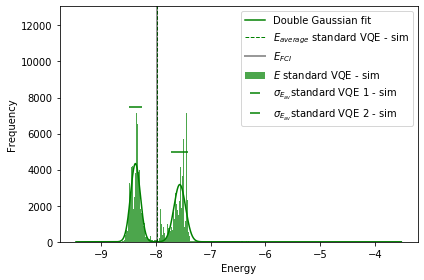

In [10]:
from matplotlib import pyplot
%matplotlib inline


# bins = len(set(E_list_SEQ_ROT_sim))
# bins_standard = len(set(E_list_STANDARD_sim))

bins = 5000
bins_standard = 5000

bin_heights_STANDARD, bin_borders_STANDARD, _=pyplot.hist(E_list_STANDARD_sim,
                                                          bins_standard, alpha=0.7,
                                                          label='$E$ standard VQE - sim',
                                                          color='g',
                                                          density=False)

bin_centers_STANDARD = bin_borders_STANDARD[:-1] + np.diff(bin_borders_STANDARD) / 2
popt, _ = curve_fit(bimodel,
                    bin_centers_STANDARD, 
                    bin_heights_STANDARD,
                    p0=[-8.5, 0., 1., -7.5, 0., 1.], 
                    **{'maxfev':10000})
mean_STANDARD1, amplitude_STANDARD1, standard_deviation_STANDARD1, mean_STANDARD2, amplitude_STANDARD2, standard_deviation_STANDARD2= popt
x_interval_for_fit = np.linspace(bin_borders_STANDARD[0], bin_borders_STANDARD[-1], 10000)
pyplot.plot(x_interval_for_fit, bimodel(x_interval_for_fit, *popt), label='Double Gaussian fit', color='g')


# pyplot.axvline(mean_STANDARD, color='g', linestyle='dashed', linewidth=1, 
#             label='$E_{average}$ standard VQE - sim') # mean of GAUSSIAN FIT

pyplot.axvline(E_list_STANDARD_sim.mean(), color='g', linestyle='dashed', linewidth=1, 
            label='$E_{average}$ standard VQE - sim') # mean of DATA

pyplot.errorbar(mean_STANDARD1,7500,
             xerr=standard_deviation_STANDARD1, linestyle="None", color='g',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$standard VQE 1 - sim')

pyplot.errorbar(mean_STANDARD2,5000,
             xerr=standard_deviation_STANDARD2, linestyle="None", color='g',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$standard VQE 2 - sim')


pyplot.axvline(fci_energy, color='k', linestyle='solid', linewidth=2, 
            label='$E_{FCI}$', alpha=0.4)

pyplot.legend(loc='upper right')
# pyplot.legend(bbox_to_anchor=(0.865,1.9), loc="upper left")
pyplot.ylabel('Frequency')
pyplot.xlabel('Energy')

pyplot.tight_layout()

file_name = 'LiH_Histogram_STANDARD_sim_double_Gaussian.jpeg'
pyplot.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')
pyplot.show()

#### LCU single

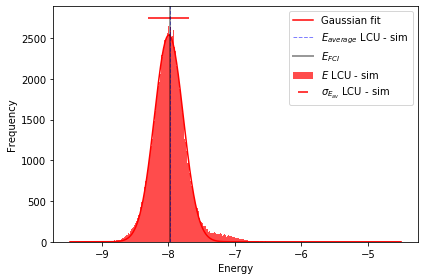

In [78]:
from matplotlib import pyplot
%matplotlib inline
# %matplotlib notebook


# bins = len(set(E_LCU_list_sim))

bins = 5000


bin_heights_LCU_sim, bin_borders_LCU_sim, _=pyplot.hist(E_LCU_list_sim, bins, alpha=0.7, 
                                                                label='$E$ LCU - sim', 
                                                                color='r',
                                                              density=False)

bin_centers_LCU_sim = bin_borders_LCU_sim[:-1] + np.diff(bin_borders_LCU_sim) / 2
popt, _ = curve_fit(gaussian, bin_centers_LCU_sim, bin_heights_LCU_sim, p0=[fci_energy, 0., 1], **{'maxfev':10000})
mean_LCU_sim, amplitude_LCU_sim, standard_deviation_LCU_sim= popt
x_interval_for_fit = np.linspace(bin_borders_LCU_sim[0], bin_borders_LCU_sim[-1], 10000)
pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='r')

# pyplot.axvline(mean_LCU_sim, alpha=0.5, color='r', linestyle='dashed', linewidth=1, 
#             label='$E_{average}$ LCU - sim') # mean of GAUSSIAN FIT
pyplot.axvline(E_LCU_list_sim.mean(), alpha=0.5, color='b', linestyle='dashed', linewidth=1, 
            label='$E_{average}$ LCU - sim') # mean of DATA

pyplot.errorbar(mean_LCU_sim,2_750,
             xerr=standard_deviation_LCU_sim, linestyle="None", color='r',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$ LCU - sim')

pyplot.axvline(fci_energy, color='k', linestyle='solid', linewidth=2, 
            label='$E_{FCI}$', alpha=0.4)

pyplot.legend(loc='upper right')
# pyplot.legend(bbox_to_anchor=(0.865,1.9), loc="upper left")
pyplot.ylabel('Frequency')
pyplot.xlabel('Energy')

pyplot.tight_layout()

file_name = 'LiH_Histogram_sim_LCU_Gaussian.jpeg'
pyplot.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')
pyplot.show()

# COMBINED DATA

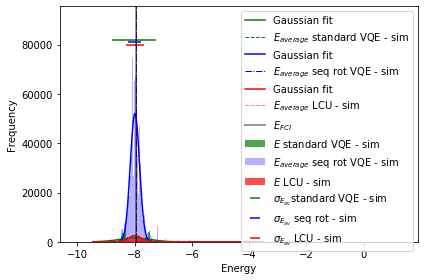

In [79]:
from matplotlib import pyplot
%matplotlib inline


# bins = len(set(E_list_SEQ_ROT_sim))
# bins_standard = len(set(E_list_STANDARD_sim))

bins = 5000
bins_standard = 5000

bin_heights_STANDARD, bin_borders_STANDARD, _=pyplot.hist(E_list_STANDARD_sim,
                                                          bins_standard, alpha=0.7,
                                                          label='$E$ standard VQE - sim',
                                                          color='g',
                                                          density=False)

bin_centers_STANDARD = bin_borders_STANDARD[:-1] + np.diff(bin_borders_STANDARD) / 2
popt, _ = curve_fit(gaussian, bin_centers_STANDARD, bin_heights_STANDARD, p0=[fci_energy, 0., 1.], **{'maxfev':10000})
mean_STANDARD, amplitude_STANDARD, standard_deviation_STANDARD= popt
x_interval_for_fit = np.linspace(bin_borders_STANDARD[0], bin_borders_STANDARD[-1], 10000)
pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='g')


# pyplot.axvline(mean_STANDARD, color='g', linestyle='dashed', linewidth=1, 
#             label='$E_{average}$ standard VQE - sim') # mean of GAUSSIAN FIT

pyplot.axvline(E_list_STANDARD_sim.mean(), color='g', linestyle='dashed', linewidth=1, 
            label='$E_{average}$ standard VQE - sim') # mean of DATA

pyplot.errorbar(mean_STANDARD,82_000,
             xerr=standard_deviation_STANDARD, linestyle="None", color='g',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$standard VQE - sim')




bin_heights_SEQ_ROT_sim, bin_borders_SEQ_ROT_sim, _=pyplot.hist(E_list_SEQ_ROT_sim, 
                                                                bins, alpha=0.3, 
                                                                label='$E_{average}$ seq rot VQE - sim', 
                                                                color='b',
                                                              density=False)

bin_centers_SEQ_ROT_sim = bin_borders_SEQ_ROT_sim[:-1] + np.diff(bin_borders_SEQ_ROT_sim) / 2
popt, _ = curve_fit(gaussian, bin_centers_SEQ_ROT_sim, bin_heights_SEQ_ROT_sim, p0=[fci_energy, 0, 1], **{'maxfev':10000})
mean_SEQ_ROT_sim, amplitude_SEQ_ROT_sim, standard_deviation_SEQ_ROT_sim= popt
# x_interval_for_fit = np.linspace(bin_borders_SEQ_ROT_sim[0], bin_borders_SEQ_ROT_sim[-1], 10000)
pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='b')


# pyplot.axvline(mean_SEQ_ROT_sim, color='b', linestyle='dashdot', linewidth=1, 
#             label='$E_{average}$ seq rot VQE - sim') # mean of GAUSSIAN FIT

pyplot.axvline(E_list_SEQ_ROT_sim.mean(), color='b', linestyle='dashdot', linewidth=1, 
            label='$E_{average}$ seq rot VQE - sim') # mean of DATA

pyplot.errorbar(mean_SEQ_ROT_sim,81_000,
             xerr=standard_deviation_SEQ_ROT_sim, linestyle="None", color='b',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$ seq rot - sim')



bin_heights_LCU_sim, bin_borders_LCU_sim, _=pyplot.hist(E_LCU_list_sim, bins, alpha=0.7, 
                                                                label='$E$ LCU - sim', 
                                                                color='r',
                                                              density=False)

bin_centers_LCU_sim = bin_borders_LCU_sim[:-1] + np.diff(bin_borders_LCU_sim) / 2
popt, _ = curve_fit(gaussian, bin_centers_LCU_sim, bin_heights_LCU_sim, p0=[fci_energy, 0., 1.], **{'maxfev':10000})
mean_LCU_sim, amplitude_LCU_sim, standard_deviation_LCU_sim= popt
# x_interval_for_fit = np.linspace(bin_borders_LCU_sim[0], bin_borders_LCU_sim[-1], 10000)
pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='r')

# pyplot.axvline(mean_LCU_sim, alpha=0.5, color='r', linestyle='dashed', linewidth=1, 
#             label='$E_{average}$ LCU - sim') # mean of GAUSSIAN FIT
pyplot.axvline(E_LCU_list_sim.mean(), alpha=0.5, color='r', linestyle='dashed', linewidth=1, 
            label='$E_{average}$ LCU - sim') # mean of DATA

pyplot.errorbar(mean_LCU_sim,80_000,
             xerr=standard_deviation_LCU_sim, linestyle="None", color='r',
             uplims=True, lolims=True, label='$\sigma_{E_{av}}$ LCU - sim')

pyplot.axvline(fci_energy, color='k', linestyle='solid', linewidth=2, 
            label='$E_{FCI}$', alpha=0.4)

pyplot.legend(loc='upper right')
# pyplot.legend(bbox_to_anchor=(0.865,1.9), loc="upper left")
pyplot.ylabel('Frequency')
pyplot.xlabel('Energy')

pyplot.tight_layout()

file_name = 'LiH_Histogram_sim_Gaussian.jpeg'
pyplot.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')
pyplot.show()

In [13]:
print('LCU data points: ', E_LCU_list_sim.shape[0])
print('SEQ ROT data points: ', E_list_SEQ_ROT_sim.shape[0])
print('STANDARD data points: ', E_list_STANDARD_sim.shape[0])

LCU data points:  1447349
SEQ ROT data points:  9985500
STANDARD data points:  1616700


In [14]:
print(E_LCU_list_sim.mean())
print(E_list_SEQ_ROT_sim.mean())
print(E_list_STANDARD_sim.mean())
print(fci_energy)

-7.971893104202789
-7.971196844868325
-7.971563986265753
-7.971184315565538


# double Gaussian

In [15]:
# from matplotlib import pyplot
# %matplotlib inline


# # bins = len(set(E_list_SEQ_ROT_sim))
# # bins_standard = len(set(E_list_STANDARD_sim))

# bins = 5000
# bins_standard = 5000

# bin_heights_STANDARD, bin_borders_STANDARD, _=pyplot.hist(E_list_STANDARD_sim,
#                                                           bins_standard, alpha=0.7,
#                                                           label='$E$ standard VQE - sim',
#                                                           color='g',
#                                                           density=False)

# bin_centers_STANDARD = bin_borders_STANDARD[:-1] + np.diff(bin_borders_STANDARD) / 2
# popt, _ = curve_fit(bimodel,
#                     bin_centers_STANDARD, 
#                     bin_heights_STANDARD,
#                     p0=[-8.5, 0., 1., -7.5, 0., 1.], 
#                     **{'maxfev':10000})
# mean_STANDARD1, amplitude_STANDARD1, standard_deviation_STANDARD1, mean_STANDARD2, amplitude_STANDARD2, standard_deviation_STANDARD2= popt
# x_interval_for_fit = np.linspace(bin_borders_STANDARD[0], bin_borders_STANDARD[-1], 10000)
# pyplot.plot(x_interval_for_fit, bimodel(x_interval_for_fit, *popt), label='Double Gaussian fit', color='g')


# # pyplot.axvline(mean_STANDARD, color='g', linestyle='dashed', linewidth=1, 
# #             label='$E_{average}$ standard VQE - sim') # mean of GAUSSIAN FIT

# pyplot.axvline(E_list_STANDARD_sim.mean(), color='g', linestyle='dashed', linewidth=1, 
#             label='$E_{average}$ standard VQE - sim') # mean of DATA

# pyplot.errorbar(mean_STANDARD1,7500,
#              xerr=standard_deviation_STANDARD1, linestyle="None", color='g',
#              uplims=True, lolims=True, label='$\sigma_{E_{av}}$standard VQE 1 - sim')

# pyplot.errorbar(mean_STANDARD2,5000,
#              xerr=standard_deviation_STANDARD2, linestyle="None", color='g',
#              uplims=True, lolims=True, label='$\sigma_{E_{av}}$standard VQE 2 - sim')


# # bin_heights_SEQ_ROT_sim, bin_borders_SEQ_ROT_sim, _=pyplot.hist(E_list_SEQ_ROT_sim, 
# #                                                                 bins, alpha=0.3, 
# #                                                                 label='$E_{average}$ seq rot VQE - sim', 
# #                                                                 color='b',
# #                                                               density=False)

# # bin_centers_SEQ_ROT_sim = bin_borders_SEQ_ROT_sim[:-1] + np.diff(bin_borders_SEQ_ROT_sim) / 2
# # popt, _ = curve_fit(gaussian, bin_centers_SEQ_ROT_sim, bin_heights_SEQ_ROT_sim, p0=[fci_energy, 0, 1], **{'maxfev':10000})
# # mean_SEQ_ROT_sim, amplitude_SEQ_ROT_sim, standard_deviation_SEQ_ROT_sim= popt
# # # x_interval_for_fit = np.linspace(bin_borders_SEQ_ROT_sim[0], bin_borders_SEQ_ROT_sim[-1], 10000)
# # pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='b')


# # # pyplot.axvline(mean_SEQ_ROT_sim, color='b', linestyle='dashdot', linewidth=1, 
# # #             label='$E_{average}$ seq rot VQE - sim') # mean of GAUSSIAN FIT

# # pyplot.axvline(E_list_SEQ_ROT_sim.mean(), color='b', linestyle='dashdot', linewidth=1, 
# #             label='$E_{average}$ seq rot VQE - sim') # mean of DATA

# # pyplot.errorbar(mean_SEQ_ROT_sim,90_000,
# #              xerr=standard_deviation_SEQ_ROT_sim, linestyle="None", color='b',
# #              uplims=True, lolims=True, label='$\sigma_{E_{av}}$ seq rot - sim')



# # bin_heights_LCU_sim, bin_borders_LCU_sim, _=pyplot.hist(E_LCU_list_sim, bins, alpha=0.7, 
# #                                                                 label='$E$ LCU - sim', 
# #                                                                 color='r',
# #                                                               density=False)

# # bin_centers_LCU_sim = bin_borders_LCU_sim[:-1] + np.diff(bin_borders_LCU_sim) / 2
# # popt, _ = curve_fit(gaussian, bin_centers_LCU_sim, bin_heights_LCU_sim, p0=[fci_energy, 0., 1.], **{'maxfev':10000})
# # mean_LCU_sim, amplitude_LCU_sim, standard_deviation_LCU_sim= popt
# # # x_interval_for_fit = np.linspace(bin_borders_LCU_sim[0], bin_borders_LCU_sim[-1], 10000)
# # pyplot.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian fit', color='r')

# # # pyplot.axvline(mean_LCU_sim, alpha=0.5, color='r', linestyle='dashed', linewidth=1, 
# # #             label='$E_{average}$ LCU - sim') # mean of GAUSSIAN FIT
# # pyplot.axvline(E_LCU_list_sim.mean(), alpha=0.5, color='r', linestyle='dashed', linewidth=1, 
# #             label='$E_{average}$ LCU - sim') # mean of DATA

# # pyplot.errorbar(mean_LCU_sim,80_000,
# #              xerr=standard_deviation_LCU_sim, linestyle="None", color='r',
# #              uplims=True, lolims=True, label='$\sigma_{E_{av}}$ LCU - sim')

# pyplot.axvline(fci_energy, color='k', linestyle='solid', linewidth=2, 
#             label='$E_{FCI}$', alpha=0.4)

# pyplot.legend(loc='upper right')
# # pyplot.legend(bbox_to_anchor=(0.865,1.9), loc="upper left")
# pyplot.ylabel('Frequency')
# pyplot.xlabel('Energy')

# pyplot.tight_layout()

# file_name = 'LiH_Histogram_sim_Gaussian.jpeg'
# pyplot.savefig(file_name, dpi=300,transparent=True,) # edgecolor='black', facecolor='white')
# pyplot.show()

# F-test

In [16]:
from scipy.stats import f
import matplotlib.pyplot as plt
from scipy import stats

https://www.statskingdom.com/220VarF2.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python

https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0

 ## important!
 
 numpy.var calculates the population variance.
    
**To calculate the sample variance, we need to specify ddof=1**

In [70]:
def f_test(x, y, alpha=0.05):
    # https://www.statology.org/f-test-python/
    x = np.array(x)
    y = np.array(y)
    X_var=np.var(x, ddof=1)
    Y_var =np.var(y, ddof=1)
    
    if Y_var>X_var:
        raise ValueError('swap variables')
    
    f = X_var/Y_var #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    
    if p < alpha:
        print('Reject the null hypothesis: Var(X) == Var(Y)')
        print('This means we have sufficient evidence to say that the two population variances are not equal.')
    
    return f, p

In [71]:
f_test(E_list_SEQ_ROT_sim, E_LCU_list_sim)

Reject the null hypothesis: Var(X) == Var(Y)
This means we have sufficient evidence to say that the two population variances are not equal.


(1.0243371900866014, 1.1102230246251565e-16)

In [72]:
f_test(E_list_STANDARD_sim, E_list_SEQ_ROT_sim)

Reject the null hypothesis: Var(X) == Var(Y)
This means we have sufficient evidence to say that the two population variances are not equal.


(2.3901305730323656, 1.1102230246251565e-16)

In [73]:
f_test(E_list_STANDARD_sim, E_LCU_list_sim)

Reject the null hypothesis: Var(X) == Var(Y)
This means we have sufficient evidence to say that the two population variances are not equal.


(2.4482996351200517, 1.1102230246251565e-16)

In [21]:
var_LCU =  E_LCU_list_sim.var(ddof=1)
var_seq_rot = E_list_SEQ_ROT_sim.var(ddof=1)
var_standard = E_list_STANDARD_sim.var(ddof=1)

deg_free_LCU = E_LCU_list_sim.shape[0]-1
deg_free_SEQ_ROT= E_list_SEQ_ROT_sim.shape[0]-1
deg_free_STANDARD= E_list_STANDARD_sim.shape[0]-1

In [40]:
print(var_LCU, var_seq_rot, var_standard)

0.07437914734788574 0.07618932679537056 0.18210243931236922


In [41]:
print(stats.shapiro(E_list_SEQ_ROT_sim))
print(stats.shapiro(E_LCU_list_sim))
print(stats.shapiro(E_list_STANDARD_sim))

# all p values bellow 0.05! 
# We have sufficient evidence to say that the sample data 
# does NOT come from a normal distribution.

# Note that the F-test is extremely sensitive to non-normality of X and Y

/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.10588622093200684, 0.0)
(0.9267424941062927, 0.0)
(0.8444530963897705, 0.0)


more robust test such as:
- Levene's test 
- Bartlett's test 
unless you're reasonably sure that X and Y are distributed normally.

In [68]:
print(stats.kstest(E_LCU_list_sim, 'norm'))
print(stats.kstest(E_list_SEQ_ROT_sim, 'norm'))
print(stats.kstest(E_list_STANDARD_sim, 'norm'))

KstestResult(statistic=0.9999977635792111, pvalue=0.0)
KstestResult(statistic=0.9998764210246557, pvalue=0.0)
KstestResult(statistic=0.9999780557749391, pvalue=0.0)


In [69]:
print(stats.shapiro(E_list_SEQ_ROT_sim))
print(stats.shapiro(E_LCU_list_sim))
print(stats.shapiro(E_list_STANDARD_sim))

/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.10588622093200684, 0.0)
(0.9267424941062927, 0.0)
(0.8444530963897705, 0.0)


In [50]:
print(stats.levene(E_LCU_list_sim, E_list_SEQ_ROT_sim, center='median'))
print(stats.levene(E_list_SEQ_ROT_sim, E_list_STANDARD_sim, center='median'))
print(stats.levene(E_list_STANDARD_sim, E_LCU_list_sim, center='median'))

LeveneResult(statistic=22816.52367229958, pvalue=0.0)
LeveneResult(statistic=1520286.8065598835, pvalue=0.0)
LeveneResult(statistic=830873.2912653893, pvalue=0.0)


In [65]:
print(stats.levene(E_LCU_list_sim, E_list_SEQ_ROT_sim, center='mean'))
xx = stats.levene(E_LCU_list_sim, E_list_SEQ_ROT_sim, center='mean')
xx.pvalue

LeveneResult(statistic=22597.98135386854, pvalue=0.0)


0.0

In [37]:
stats.bartlett(E_LCU_list_sim, E_list_SEQ_ROT_sim)

BartlettResult(statistic=363.27450726333564, pvalue=5.452281348471969e-81)

In [47]:
stats.fligner(E_LCU_list_sim, E_list_SEQ_ROT_sim)

FlignerResult(statistic=63587.82689345139, pvalue=0.0)

In [24]:
from scipy.stats import f, norm

def plot_f_distrubiton(dfn, dfd):
#     dfn (degrees of freedom numerator)
#     dfd (degrees of freedom denominator)

    # Set figure 
    plt.figure(figsize=(12, 8))
    
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))

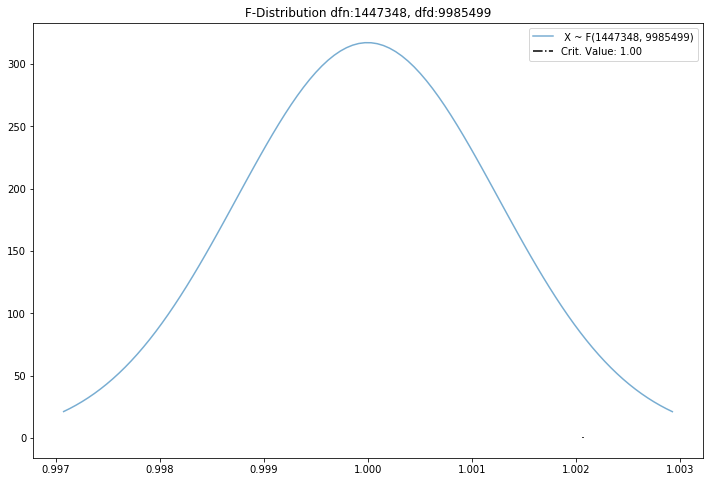

In [25]:
plot_f_distrubiton(deg_free_LCU, deg_free_SEQ_ROT)

In [26]:
F = var_seq_rot/var_LCU
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = f.cdf(F, deg_free_SEQ_ROT, deg_free_LCU)
if p_value > alpha:
    print('Reject the null hypothesis that Var(SEQ_ROT) == Var(LCU), P_value = {}'.format(p_value))
    print(F)
    
    

Reject the null hypothesis that Var(SEQ_ROT) == Var(LCU), P_value = 0.9999999999999999
1.0243371900866014


In [27]:
F = var_standard/var_LCU
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = f.cdf(F, deg_free_STANDARD, deg_free_LCU)
if p_value > alpha:
    print('Reject the null hypothesis that Var(SEQ_ROT) == Var(LCU), P_value = {}'.format(p_value))
    print(F)
    

Reject the null hypothesis that Var(SEQ_ROT) == Var(LCU), P_value = 0.9999999999999999
2.4482996351200517


In [28]:
F = var_standard/var_seq_rot
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = f.cdf(F, deg_free_STANDARD, deg_free_SEQ_ROT)
if p_value > alpha:
    print('Reject the null hypothesis that Var(SEQ_ROT) == Var(LCU), P_value = {}'.format(p_value))
    print(F)
    

Reject the null hypothesis that Var(SEQ_ROT) == Var(LCU), P_value = 0.9999999999999999
2.3901305730323656


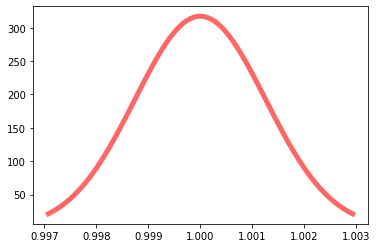

In [29]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(f.ppf(0.01, deg_free_SEQ_ROT-1, deg_free_LCU-1),
                f.ppf(0.99,  deg_free_SEQ_ROT-1, deg_free_LCU-1), 100)
ax.plot(x, f.pdf(x, deg_free_SEQ_ROT-1, deg_free_LCU-1),
       'r-', lw=5, alpha=0.6, label='f pdf')

In [30]:
print('Variance a={0:.3f}, Variance b={1:.3f}'.format(var_LCU, var_seq_rot))
fstatistics = var_LCU/var_seq_rot # because we estimate mean from data
fdistribution = f(deg_free_LCU-1,deg_free_SEQ_ROT-1) # build an F-distribution object
f_critical1 = fdistribution.ppf(0.025)
f_critical2 = fdistribution.ppf(0.975)
p_value = 2*min(fdistribution.cdf(f_critical1), 1-fdistribution.cdf(f_critical2))
print(fstatistics,f_critical1, f_critical2 )
if (p_value<0.05):
    print('Reject H0', p_value)
else:
    print('Cant Reject H0', p_value)

Variance a=0.074, Variance b=0.076
0.9762410363285319 0.9975365921984564 1.0024671848305766
Reject H0 0.04999999998528624


In [31]:
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')


NameError: name 'dfn' is not defined

In [ ]:
a = [1,2,1,2,1,2,1,2,1,2]
b = [1,3,-1,2,1,5,-1,6,-1,2]
print('Variance a={0:.3f}, Variance b={1:.3f}'.format(np.var(a, ddof=1), np.var(b, ddof=1)))
fstatistics = np.var(a, ddof=1)/np.var(b, ddof=1) # because we estimate mean from data
fdistribution = f(len(a)-1,len(b)-1) # build an F-distribution object
p_value = 2*min(fdistribution.cdf(f_critical), 1-fdistribution.cdf(f_critical))
f_critical1 = fdistribution.ppf(0.025)
f_critical2 = fdistribution.ppf(0.975)
print(fstatistics,f_critical1, f_critical2 )
if (p_value<0.05):
    print('Reject H0', p_value)
else:
    print('Cant Reject H0', p_value)


# BOOTSTRAPPING

In [ ]:
from tqdm.notebook import tqdm

In [93]:
def bootstrap_resample_MEAN(numpy_array, N_resamples, alpha=0.05, seed_int=None, precision=4):
    
    if seed_int:
        np.random.seed(seed_int)
    
    sample_mean = numpy_array.mean() 
#     bootstrap_array=np.zeros((numpy_array.shape[0], N_resamples))
    bootstrap_mean_delta=np.zeros(N_resamples)
    
    for column_index in tqdm(range(N_resamples)):
        boot_strap_sample=np.random.choice(numpy_array,size=numpy_array.shape[0], replace=True)
#         bootstrap_array[:,column_index]=boot_strap_sample
        bootstrap_mean_delta[column_index]=boot_strap_sample.mean() - sample_mean
    
    
    sorted_delta_MEAN=np.sort(bootstrap_mean_delta)
    
    
    crit1 = sorted_delta_MEAN[int(N_resamples*(1-alpha/2))]
    crit2 = sorted_delta_MEAN[int(N_resamples*alpha/2)]
    
    
#     mean_CI = (sample_mean-crit1, sample_mean+crit2)
    mean_CI = (np.format_float_scientific(sample_mean-crit1, precision=precision), 
               np.format_float_scientific(sample_mean-crit2, precision=precision))
    
    
    return np.format_float_scientific(sample_mean, precision=precision), mean_CI

In [94]:
def bootstrap_resample_VAR(numpy_array, N_resamples, alpha=0.05, seed_int=None, precision=4):
    
    # sample varience = sum(x_i - x_bar_i)**2/(N-1)
    
    if seed_int:
        np.random.seed(seed_int)
    
    sample_var = numpy_array.var(ddof=1) 
    bootstrap_var_delta=np.zeros(N_resamples)
    
    for column_index in tqdm(range(N_resamples)):
        boot_strap_sample=np.random.choice(numpy_array,size=numpy_array.shape[0], replace=True)
        bootstrap_var_delta[column_index]=boot_strap_sample.var(ddof=1) - sample_var
    
    
    sorted_delta_VAR=np.sort(bootstrap_var_delta)
    
    crit1 = sorted_delta_VAR[int(N_resamples*(1-alpha/2))]
    crit2 = sorted_delta_VAR[int(N_resamples*alpha/2)]

#     var_CI = (sample_var-crit1, sample_var+crit2)
    
    var_CI = (np.format_float_scientific(sample_var-crit1, precision=precision), 
           np.format_float_scientific(sample_var-crit2, precision=precision))
    
    return np.format_float_scientific(sample_var, precision=precision), var_CI

In [95]:
def bootstrap_resample_SEOM(numpy_array, N_resamples, alpha=0.05, seed_int=None, precision=4):
    # SEOM = standard error on the mean
    if seed_int:
        np.random.seed(seed_int)
    
    sample_std = numpy_array.std(ddof=1)
    sample_SE = sample_std/np.sqrt(numpy_array.shape[0])
    bootstrap_SE_delta=np.zeros(N_resamples)
    
    for column_index in tqdm(range(N_resamples)):
        boot_strap_sample=np.random.choice(numpy_array,size=numpy_array.shape[0], replace=True)
        bootstrap_SE_delta[column_index]= boot_strap_sample.std(ddof=1)/np.sqrt(numpy_array.shape[0])
    
    sorted_delta_SE=np.sort(bootstrap_SE_delta)
    
    crit1 = sorted_delta_SE[int(N_resamples*(1-alpha/2))] 
    crit2 = sorted_delta_SE[int(N_resamples*alpha/2)]

#     se_CI = (sample_SE-crit1, sample_SE+crit2)
    se_CI = (np.format_float_scientific(sample_SE-crit1, precision=precision), 
       np.format_float_scientific(sample_SE-crit2, precision=precision))
    
    return np.format_float_scientific(sample_SE, precision=precision), se_CI

In [96]:
## SIM
standard_sim_se, CI_standard_sim_se = bootstrap_resample_SEOM(E_list_STANDARD_sim, 10_000, alpha=0.05)
seq_rot_sim_se, CI_seq_rot_sim_se = bootstrap_resample_SEOM(E_list_SEQ_ROT_sim, 10_000, alpha=0.05)
LCU_sim_se, CI_LCU_sim_se = bootstrap_resample_SEOM(E_LCU_list_sim, 10_000, alpha=0.05)

standard_sim_mean, CI_standard_sim_mean = bootstrap_resample_MEAN(E_list_STANDARD_sim, 10_000, alpha=0.05)
seq_rot_sim_mean, CI_seq_rot_sim_mean = bootstrap_resample_MEAN(E_list_SEQ_ROT_sim, 10_000, alpha=0.05)
LCU_sim_mean, CI_LCU_sim_mean = bootstrap_resample_MEAN(E_LCU_list_sim, 10_000, alpha=0.05)

standard_sim_var, CI_standard_sim_var = bootstrap_resample_VAR(E_list_STANDARD_sim, 10_000, alpha=0.05)
seq_rot_sim_var, CI_seq_rot_sim_var = bootstrap_resample_VAR(E_list_SEQ_ROT_sim, 10_000, alpha=0.05)
LCU_sim_var, CI_LCU_sim_var = bootstrap_resample_VAR(E_LCU_list_sim, 10_000, alpha=0.05)

In [99]:
import pandas as pd
from collections import OrderedDict

In [100]:
#{'Method': ,'Experiment':, 'RMS error': , 'CI_RMS': , 'Mean': , 'Mean_CI': , 'Variance': , 'Variance_CI':}
data = [
            
        ### SIM
        {'Method': 'LCU - sim', 'Backend': 'simulator', 'SEM': LCU_sim_se, 'CI_SEM': CI_LCU_sim_se,
          'Mean': LCU_sim_mean, 'Mean_CI': CI_LCU_sim_mean, 'Variance': LCU_sim_var,
         'Variance_CI':CI_LCU_sim_var},
         
         {'Method': 'SeqRot - sim', 'Backend': 'simulator', 'SEM': seq_rot_sim_se, 'CI_SEM': CI_seq_rot_sim_se,
          'Mean': seq_rot_sim_mean, 'Mean_CI': CI_seq_rot_sim_mean, 'Variance': seq_rot_sim_var, 
          'Variance_CI':CI_seq_rot_sim_var},
         
         {'Method': 'Std - sim', 'Backend': 'simulator', 'SEM': standard_sim_se , 'CI_SEM': CI_standard_sim_se,
          'Mean': standard_sim_mean, 'Mean_CI': CI_standard_sim_mean, 'Variance': standard_sim_var, 
          'Variance_CI':CI_standard_sim_var},
        ]
df = pd.DataFrame(data)
df

,Method,Backend,SEM,CI_SEM,Mean,Mean_CI,Variance,Variance_CI
0,LCU - sim,simulator,2.2669e-04,"(-4.5653e-07, 4.5866e-07)",-7.9719e+00,"(-7.9723e+00, -7.9714e+00)",7.4379e-02,"(7.4082e-02, 7.4682e-02)"
1,SeqRot - sim,simulator,8.735e-05,"(-2.2210e-07, 2.21e-07)",-7.9712e+00,"(-7.9714e+00, -7.9710e+00)",7.6189e-02,"(7.5804e-02, 7.6576e-02)"
2,Std - sim,simulator,3.3562e-04,"(-3.4367e-07, 3.4151e-07)",-7.9716e+00,"(-7.9722e+00, -7.9709e+00)",1.8210e-01,"(1.8174e-01, 1.8247e-01)"


In [101]:
print(df.to_latex(index=False))  

\begin{tabular}{llllllll}
\toprule
       Method &    Backend &         SEM &                     CI\_SEM &         Mean &                     Mean\_CI &    Variance &               Variance\_CI \\
\midrule
    LCU - sim &  simulator &  2.2669e-04 &  (-4.5653e-07, 4.5866e-07) &  -7.9719e+00 &  (-7.9723e+00, -7.9714e+00) &  7.4379e-02 &  (7.4082e-02, 7.4682e-02) \\
 SeqRot - sim &  simulator &   8.735e-05 &    (-2.2210e-07, 2.21e-07) &  -7.9712e+00 &  (-7.9714e+00, -7.9710e+00) &  7.6189e-02 &  (7.5804e-02, 7.6576e-02) \\
    Std - sim &  simulator &  3.3562e-04 &  (-3.4367e-07, 3.4151e-07) &  -7.9716e+00 &  (-7.9722e+00, -7.9709e+00) &  1.8210e-01 &  (1.8174e-01, 1.8247e-01) \\
\bottomrule
\end{tabular}

